# Requirements

In [1]:
import matplotlib.pyplot as plt
from selenium import webdriver
from selenium.webdriver.common.by import By
import pandas as pd

# Configuration

In [ ]:
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')

# Simple Usage

In [ ]:
# Initialize the webdriver.
browser = webdriver.Chrome(options=options)

In [ ]:
# Navigate to a web page.
browser.get('https://www.apple.com/mk/')

In [ ]:
# Print the page source code.
print(browser.page_source)

In [ ]:
# Select an element from the page.
element = browser.find_element(By.CLASS_NAME, 'headline')

In [ ]:
# Print the element's innner text.
print(element.text)

# Laboratory Exercise - Run Mode (8 points)

In this laboratory assignment, the goal is to perform web scraping using **Selenium** on the website https://www.scrapethissite.com/pages/forms/. The task includes the extraction of **hockey team names** and their **wins** and **losses** in the respective **year** for a minimum of 25 hockey teams. Following this data extraction, you will construct a data frame to organize the collected data. Finally, you are expected to generate a histogram to provide a visual representation of the distribution of wins and losses in the year 1990.

## Hints
- To navigate to a specific page with a given URL, use the `browser.get(url)` method.
- When selecting a single element, use `browser.find_element`, and for multiple elements, use `browser.find_elements`. Both of these functions take two arguments. The first specifies the attribute used to locate the element on the web page, and the second specifies the value of that attribute.
- The `By` class is used to specify which attribute is used to locate elements on a page. These are the various ways the attributes are used to locate elements on a page: `By.ID`, `By.NAME`, `By.TAG_NAME`, `BY.CLASS_NAME`, `By.CSS_SELECTOR`, etc.
- For more details, check the documentation (https://selenium-python.readthedocs.io/locating-elements.html).

## Solution

In [ ]:
# Write your code here.

In [ ]:
# Add as many code boxes as you need.

In [2]:
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')

In [6]:
chrome = webdriver.Chrome(chrome_options)
snapshot_url = "https://www.scrapethissite.com/pages/forms/"
chrome.get(snapshot_url)

In [9]:
team_elements = chrome.find_elements(By.CSS_SELECTOR, "tr.team")
team_elements

[<selenium.webdriver.remote.webelement.WebElement (session="b952371ba069249ebb8ddbfe67e8e11e", element="f.7246D95F5A21C25BE477AADA7777CB79.d.0F91746A9705DB29047F0215F6CBA850.e.77")>,
 <selenium.webdriver.remote.webelement.WebElement (session="b952371ba069249ebb8ddbfe67e8e11e", element="f.7246D95F5A21C25BE477AADA7777CB79.d.0F91746A9705DB29047F0215F6CBA850.e.79")>,
 <selenium.webdriver.remote.webelement.WebElement (session="b952371ba069249ebb8ddbfe67e8e11e", element="f.7246D95F5A21C25BE477AADA7777CB79.d.0F91746A9705DB29047F0215F6CBA850.e.81")>,
 <selenium.webdriver.remote.webelement.WebElement (session="b952371ba069249ebb8ddbfe67e8e11e", element="f.7246D95F5A21C25BE477AADA7777CB79.d.0F91746A9705DB29047F0215F6CBA850.e.83")>,
 <selenium.webdriver.remote.webelement.WebElement (session="b952371ba069249ebb8ddbfe67e8e11e", element="f.7246D95F5A21C25BE477AADA7777CB79.d.0F91746A9705DB29047F0215F6CBA850.e.84")>,
 <selenium.webdriver.remote.webelement.WebElement (session="b952371ba069249ebb8ddbfe6

In [30]:
teams = []
for team_element in team_elements:
    name_element = team_element.find_element(By.CSS_SELECTOR, "td.name")
    name = name_element.text
    year_element = team_element.find_element(By.CSS_SELECTOR, "td.year")
    year = int(year_element.text)
    wins_element = team_element.find_element(By.CSS_SELECTOR, "td.wins")
    wins = int(wins_element.text)
    losses_element = team_element.find_element(By.CSS_SELECTOR, "td.losses")
    losses = int(losses_element.text)
    team_info = {"Name":name, "Year":year, "Wins":wins, "Loses":losses}
    teams.append(team_info)

teams
    

[{'Name': 'Boston Bruins', 'Year': 1990, 'Wins': 44, 'Loses': 24},
 {'Name': 'Buffalo Sabres', 'Year': 1990, 'Wins': 31, 'Loses': 30},
 {'Name': 'Calgary Flames', 'Year': 1990, 'Wins': 46, 'Loses': 26},
 {'Name': 'Chicago Blackhawks', 'Year': 1990, 'Wins': 49, 'Loses': 23},
 {'Name': 'Detroit Red Wings', 'Year': 1990, 'Wins': 34, 'Loses': 38},
 {'Name': 'Edmonton Oilers', 'Year': 1990, 'Wins': 37, 'Loses': 37},
 {'Name': 'Hartford Whalers', 'Year': 1990, 'Wins': 31, 'Loses': 38},
 {'Name': 'Los Angeles Kings', 'Year': 1990, 'Wins': 46, 'Loses': 24},
 {'Name': 'Minnesota North Stars', 'Year': 1990, 'Wins': 27, 'Loses': 39},
 {'Name': 'Montreal Canadiens', 'Year': 1990, 'Wins': 39, 'Loses': 30},
 {'Name': 'New Jersey Devils', 'Year': 1990, 'Wins': 32, 'Loses': 33},
 {'Name': 'New York Islanders', 'Year': 1990, 'Wins': 25, 'Loses': 45},
 {'Name': 'New York Rangers', 'Year': 1990, 'Wins': 36, 'Loses': 31},
 {'Name': 'Philadelphia Flyers', 'Year': 1990, 'Wins': 33, 'Loses': 37},
 {'Name': '

In [31]:
teams_df = pd.DataFrame(teams)
teams_df

,Name,Year,Wins,Loses
0,Boston Bruins,1990,44,24
1,Buffalo Sabres,1990,31,30
2,Calgary Flames,1990,46,26
3,Chicago Blackhawks,1990,49,23
4,Detroit Red Wings,1990,34,38
5,Edmonton Oilers,1990,37,37
6,Hartford Whalers,1990,31,38
7,Los Angeles Kings,1990,46,24
8,Minnesota North Stars,1990,27,39
9,Montreal Canadiens,1990,39,30


In [32]:
teams_df.groupby("Year")[["Wins","Loses"]].count()

,Wins,Loses
Year,,
1990,21,21
1991,4,4


In [33]:
teams_df_90 = teams_df[teams_df["Year"] == 1990]
teams_df_90

,Name,Year,Wins,Loses
0,Boston Bruins,1990,44,24
1,Buffalo Sabres,1990,31,30
2,Calgary Flames,1990,46,26
3,Chicago Blackhawks,1990,49,23
4,Detroit Red Wings,1990,34,38
5,Edmonton Oilers,1990,37,37
6,Hartford Whalers,1990,31,38
7,Los Angeles Kings,1990,46,24
8,Minnesota North Stars,1990,27,39
9,Montreal Canadiens,1990,39,30


In [34]:
from VNP.packages.visualization import *

In [46]:
teams_df_90

,Name,Year,Wins,Loses
0,Boston Bruins,1990,44,24
1,Buffalo Sabres,1990,31,30
2,Calgary Flames,1990,46,26
3,Chicago Blackhawks,1990,49,23
4,Detroit Red Wings,1990,34,38
5,Edmonton Oilers,1990,37,37
6,Hartford Whalers,1990,31,38
7,Los Angeles Kings,1990,46,24
8,Minnesota North Stars,1990,27,39
9,Montreal Canadiens,1990,39,30


array([[<Axes: title={'center': 'Wins'}>,
        <Axes: title={'center': 'Loses'}>]], dtype=object)

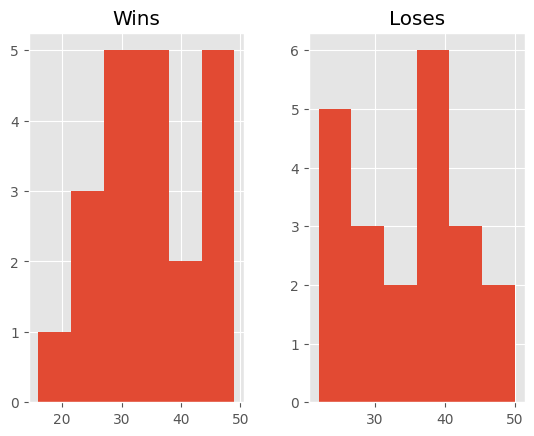

In [48]:
teams_df_90.drop(columns="Year").hist(bins=6)

(array([1., 3., 5., 5., 2., 5.]),
 array([16. , 21.5, 27. , 32.5, 38. , 43.5, 49. ]),
 <BarContainer object of 6 artists>)

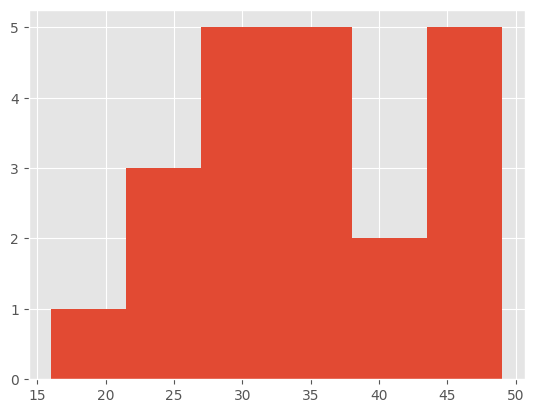

In [115]:
plt.hist(teams_df_90["Wins"], bins=6)

(array([5., 3., 2., 6., 3., 2.]),
 array([22.        , 26.66666667, 31.33333333, 36.        , 40.66666667,
        45.33333333, 50.        ]),
 <BarContainer object of 6 artists>)

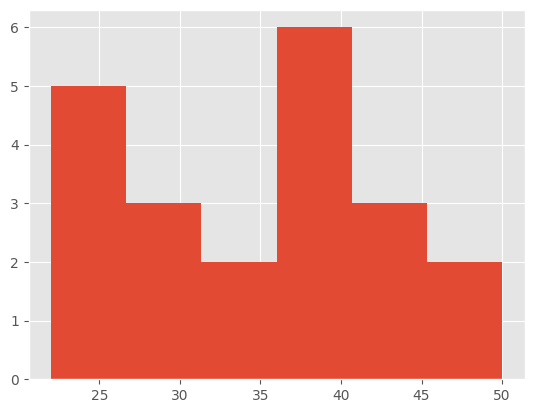

In [116]:
plt.hist(teams_df_90["Loses"], bins=6)

# Laboratory Exercise - Bonus Task (+ 2 points)

In the context of scraping the website https://www.scrapethissite.com/pages/forms/, the additional task involves searching for the hockey team 'Boston Bruins' using the available search field. You will extract the wins and losses data for this team covering the years from 1990 to 2011. After gathering this information, your task is to create a line plot where the wins and losses of the 'Boston Bruins' team are visualized across the years, displaying both trends on the same plot.

## Hints
- To populate an input field (`input_field`) with some `text` use `input_field.send_keys(text)`.
- To click on a specific `element` on a web page use `element.click()`.

## Solution

In [ ]:
# Write your code here.

In [ ]:
# Add as many code boxes as you need.

In [107]:
search_keyword = "Boston Bruins"
input_element = chrome.find_element(By.CSS_SELECTOR, "input.form-control")
input_element.send_keys(search_keyword)
search_button = chrome.find_element(By.CSS_SELECTOR, 'input[type="submit"].btn-primary')
search_button.click()

[]

In [109]:
one_team_elements = chrome.find_elements(By.CSS_SELECTOR, "tr.team")
one_team_elements

[<selenium.webdriver.remote.webelement.WebElement (session="b952371ba069249ebb8ddbfe67e8e11e", element="f.7246D95F5A21C25BE477AADA7777CB79.d.44439E0FDACBD477629C0CF0620F4EDB.e.1609")>,
 <selenium.webdriver.remote.webelement.WebElement (session="b952371ba069249ebb8ddbfe67e8e11e", element="f.7246D95F5A21C25BE477AADA7777CB79.d.44439E0FDACBD477629C0CF0620F4EDB.e.1627")>,
 <selenium.webdriver.remote.webelement.WebElement (session="b952371ba069249ebb8ddbfe67e8e11e", element="f.7246D95F5A21C25BE477AADA7777CB79.d.44439E0FDACBD477629C0CF0620F4EDB.e.1645")>,
 <selenium.webdriver.remote.webelement.WebElement (session="b952371ba069249ebb8ddbfe67e8e11e", element="f.7246D95F5A21C25BE477AADA7777CB79.d.44439E0FDACBD477629C0CF0620F4EDB.e.1663")>,
 <selenium.webdriver.remote.webelement.WebElement (session="b952371ba069249ebb8ddbfe67e8e11e", element="f.7246D95F5A21C25BE477AADA7777CB79.d.44439E0FDACBD477629C0CF0620F4EDB.e.1681")>,
 <selenium.webdriver.remote.webelement.WebElement (session="b952371ba069249

In [111]:
one_team_info = []

for team_element in one_team_elements:
    name_element = team_element.find_element(By.CSS_SELECTOR, "td.name")
    name = name_element.text
    year_element = team_element.find_element(By.CSS_SELECTOR, "td.year")
    year = int(year_element.text)
    wins_element = team_element.find_element(By.CSS_SELECTOR, "td.wins")
    wins = int(wins_element.text)
    losses_element = team_element.find_element(By.CSS_SELECTOR, "td.losses")
    losses = int(losses_element.text)
    team_info = {"Name":name, "Year":year, "Wins":wins, "Loses":losses}
    one_team_info.append(team_info)

one_team_info

[{'Name': 'Boston Bruins', 'Year': 1990, 'Wins': 44, 'Loses': 24},
 {'Name': 'Boston Bruins', 'Year': 1991, 'Wins': 36, 'Loses': 32},
 {'Name': 'Boston Bruins', 'Year': 1992, 'Wins': 51, 'Loses': 26},
 {'Name': 'Boston Bruins', 'Year': 1993, 'Wins': 42, 'Loses': 29},
 {'Name': 'Boston Bruins', 'Year': 1994, 'Wins': 27, 'Loses': 18},
 {'Name': 'Boston Bruins', 'Year': 1995, 'Wins': 40, 'Loses': 31},
 {'Name': 'Boston Bruins', 'Year': 1996, 'Wins': 26, 'Loses': 47},
 {'Name': 'Boston Bruins', 'Year': 1997, 'Wins': 39, 'Loses': 30},
 {'Name': 'Boston Bruins', 'Year': 1998, 'Wins': 39, 'Loses': 30},
 {'Name': 'Boston Bruins', 'Year': 1999, 'Wins': 24, 'Loses': 33},
 {'Name': 'Boston Bruins', 'Year': 2000, 'Wins': 36, 'Loses': 30},
 {'Name': 'Boston Bruins', 'Year': 2001, 'Wins': 43, 'Loses': 24},
 {'Name': 'Boston Bruins', 'Year': 2002, 'Wins': 36, 'Loses': 31},
 {'Name': 'Boston Bruins', 'Year': 2003, 'Wins': 41, 'Loses': 19},
 {'Name': 'Boston Bruins', 'Year': 2005, 'Wins': 29, 'Loses': 

In [128]:
one_team_df = pd.DataFrame(one_team_info)
one_team_df

,Name,Year,Wins,Loses
0,Boston Bruins,1990,44,24
1,Boston Bruins,1991,36,32
2,Boston Bruins,1992,51,26
3,Boston Bruins,1993,42,29
4,Boston Bruins,1994,27,18
5,Boston Bruins,1995,40,31
6,Boston Bruins,1996,26,47
7,Boston Bruins,1997,39,30
8,Boston Bruins,1998,39,30
9,Boston Bruins,1999,24,33


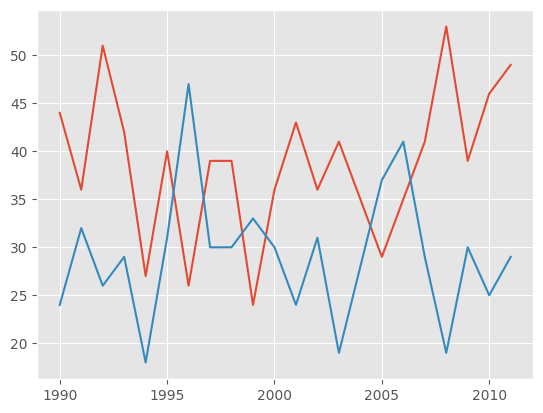

In [145]:
plt.plot("Year", "Wins", data=one_team_df)
plt.plot("Year","Loses", data=one_team_df)
plt.show()

In [144]:
px.line(one_team_df.sort_values("Year"),
    x='Year',
    y=["Wins", "Loses"],
    title='Wins and Loses Per Year',
    width=800,
    height=700)

In [143]:
px.area(
    one_team_df.sort_values("Year"),
    x='Year',
    y=["Wins", "Loses"],
    title='Wins and Loses Per Year',
    width=800,
    height=700
)